## **Processed Data**

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import m_eda_plots as edap
import m_metrics as met

sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10


In [2]:
# import preprocessed data

PATH = 'processed_data/df_01.csv'
df = pd.read_csv(PATH)
size = os.path.getsize(PATH)

print('Data: df_01.csv')
print(f'{df.shape[0]} rows and {df.shape[1]} columns')
print(f'{size} bytes')

Data: df_01.csv
4454601 rows and 23 columns
485540788 bytes


In [3]:
df.head()

,client_id,creation_date,district,region,client_catg,target,invoice_date,tarif_type,counter_number,counter_statue,...,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month
0,train_Client_0,1994-12-31,60,101,11,0.0,2014-03-24,11,1335667,0,...,82,0,0,0,14302,14384,4,ELEC,2014,3
1,train_Client_0,1994-12-31,60,101,11,0.0,2013-03-29,11,1335667,0,...,1200,184,0,0,12294,13678,4,ELEC,2013,3
2,train_Client_0,1994-12-31,60,101,11,0.0,2015-03-23,11,1335667,0,...,123,0,0,0,14624,14747,4,ELEC,2015,3
3,train_Client_0,1994-12-31,60,101,11,0.0,2015-07-13,11,1335667,0,...,102,0,0,0,14747,14849,4,ELEC,2015,7
4,train_Client_0,1994-12-31,60,101,11,0.0,2016-11-17,11,1335667,0,...,572,0,0,0,15066,15638,12,ELEC,2016,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454601 entries, 0 to 4454600
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   client_id             object 
 1   creation_date         object 
 2   district              int64  
 3   region                int64  
 4   client_catg           int64  
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        int64  
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
 21  year                  int64  
 22  month                 int64  
dtypes: floa

In [5]:
df.columns

Index(['client_id', 'creation_date', 'district', 'region', 'client_catg',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'year', 'month'],
      dtype='object')

## **Create new features**

### **creation_date, invoice_date**

In [6]:
# transform date column to datetime format
date = ['creation_date', 'invoice_date']
for col in date:
    df[col] = pd.to_datetime(df[col])
    print(f'Type of {col}: {df[col].dtype}')

Type of creation_date: datetime64[ns]
Type of invoice_date: datetime64[ns]


### **before**

In [7]:
# create a new categorical feature: if the invoice is issued before the creation date
df['before'] = df['creation_date'] > df['invoice_date']

# transform the boolean feature to integer
df['before'] = df['before'].astype(int)
df['before'].value_counts()


before
0    4440991
1      13610
Name: count, dtype: int64

### **year, month**

In [8]:
# add new features year and month
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df.year.dtype, df.month.dtype


(dtype('int32'), dtype('int32'))

The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target     0.0    1.0   ratio_0   ratio_1
year                                     
2005     60270   4392  0.932078  0.067922
2006    204340  17430  0.921405  0.078595
2007    227006  19178  0.922099  0.077901
2008    242532  20681  0.921429  0.078571
2009    261578  22797  0.919835  0.080165
2010    290379  25850  0.918255  0.081745
2011    285177  25225  0.918734  0.081266
2012    295390  26721  0.917044  0.082956
2013    308067  27877  0.917019  0.082981
2014    315102  28272  0.917664  0.082336
2015    331561  29198  0.919065  0.080935
2016    353686  29966  0.921893  0.078107
2017    378778  32153  0.921756  0.078244
2018    311177  24465  0.927110  0.072890
2019    236446  18907  0.925957  0.074043



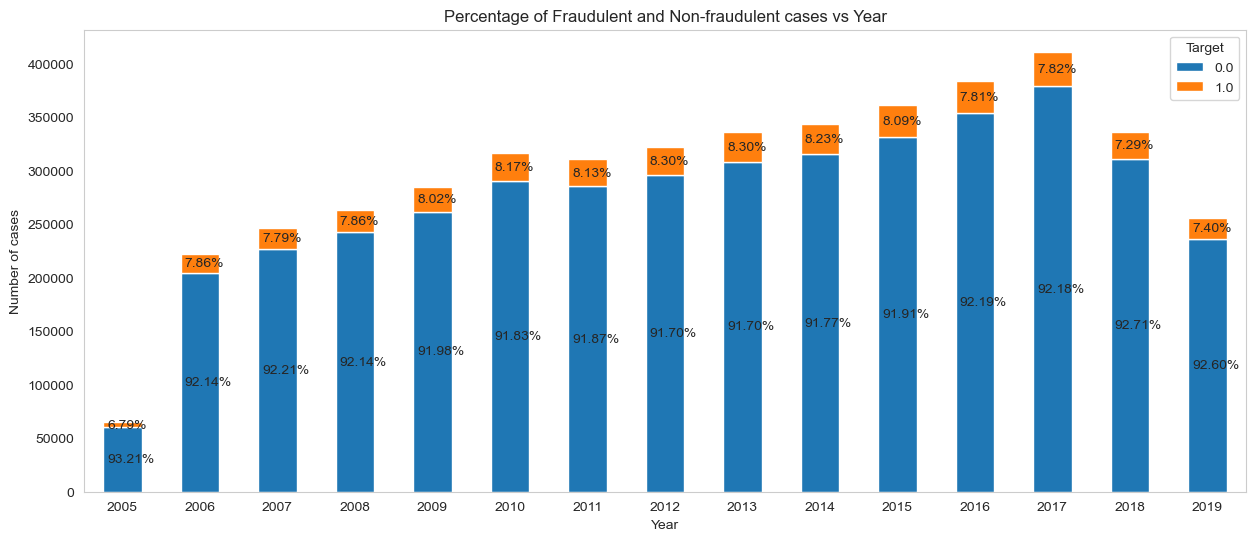

The highest rate of fraudulent is year = 2013 with rate 8.30%
The second highest rate of fraudulent is tarif_type = 2012 with rate 8.30%
The third highest rate of fraudulent is tarif_type = 2014 with rate 8.23%


In [9]:
# plot Percentage of Fraudulent and Non-Fraudulent Cases Over Year
edap.feature_target_distribution(df, 'year', 'target')


The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target     0.0    1.0   ratio_0   ratio_1
month                                    
1       346614  31680  0.916256  0.083744
2       377718  37992  0.908609  0.091391
3       367801  32372  0.919105  0.080895
4       374495  32930  0.919175  0.080825
5       382709  33803  0.918843  0.081157
6       337129  27981  0.923363  0.076637
7       327842  25320  0.928305  0.071695
8       324847  26096  0.925640  0.074360
9       307375  27237  0.918601  0.081399
10      319554  26790  0.922649  0.077351
11      331626  26402  0.926257  0.073743
12      303779  24509  0.925343  0.074657



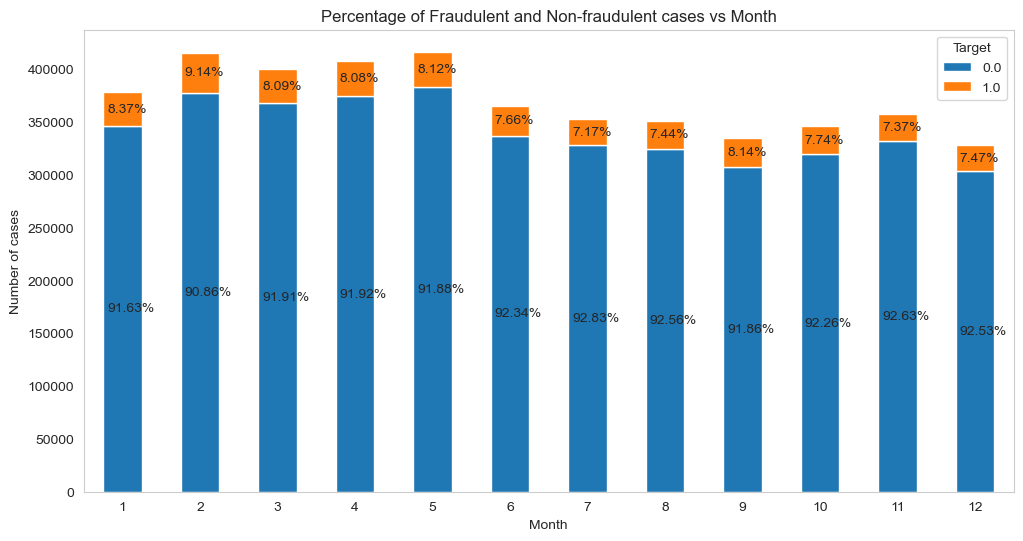

The highest rate of fraudulent is month = 2 with rate 9.14%
The second highest rate of fraudulent is tarif_type = 1 with rate 8.37%
The third highest rate of fraudulent is tarif_type = 9 with rate 8.14%


In [10]:
# plot Percentage of Fraudulent and Non-Fraudulent Cases Over Month
edap.feature_target_distribution(df, 'month', 'target')

### **numerical features**

### **consumption, consumption_per_month, index_interval, index_interval_per_month**

In [11]:
# sum up the consumption of all levels
df['consumption'] = df['consommation_level_1'] + df['consommation_level_2'] + df['consommation_level_3'] + df['consommation_level_4']
# divide the consumption by the number of months
df['consumption_per_month'] = df['consumption'] / df['months_number']
# calculate the interval between the old and new index
df['index_interval'] = df['new_index'] - df['old_index']
# divide the interval by the number of months
df['index_interval_per_month'] = df['index_interval'] / df['months_number']

### **diff**

In [12]:
# create a new feature: if 'counter_coefficient * index_interval != consumption'
df['diff'] = df['counter_coefficient'] * df['index_interval'] != df['consumption']
# transform boolean to integer
df['diff'] = df['diff'].astype(int)

### **counter_code, uniq_counter**

In [13]:
# inspect how many unique counter_code in each client_id
df.query('client_id == "train_Client_100083"')[['counter_code', 'target']].nunique()

counter_code    3
target          1
dtype: int64

In [14]:
# create a new column to record the number of unique counter_code in each client_id
df['uniq_counter'] = df.groupby('client_id')['counter_code'].transform('nunique')
# check if the new column is correct
print(df.query('client_id == "train_Client_100083"').uniq_counter[:1])


2947    3
Name: uniq_counter, dtype: int64


The table means the number and the ratio of non-fraudulent and fraudulent cases for each feature value.
target          0.0   1.0   ratio_0   ratio_1
uniq_counter                                 
1.0           61232  2322  0.963464  0.036536
2.0           54452  4058  0.930644  0.069356
3.0            4700  1056  0.816539  0.183461
4.0             384   120  0.761905  0.238095
5.0              24     8  0.750000  0.250000
6.0               5     2  0.714286  0.285714



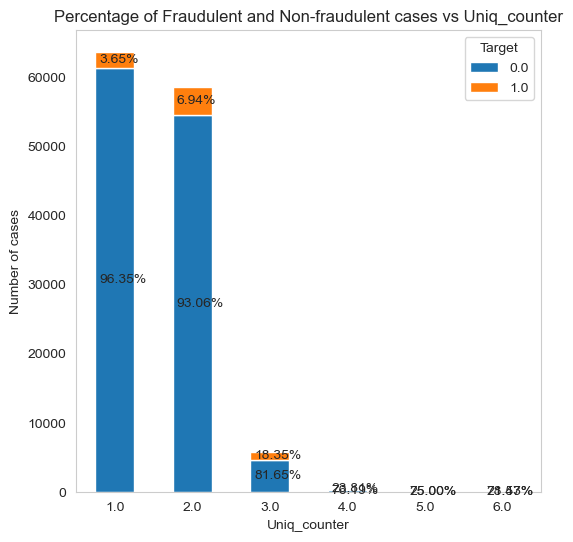

The highest rate of fraudulent is uniq_counter = 6.0 with rate 28.57%
The second highest rate of fraudulent is tarif_type = 5.0 with rate 25.00%
The third highest rate of fraudulent is tarif_type = 4.0 with rate 23.81%


In [15]:
# plot distribution of target cases vs uniq_counter
agg_df = df.groupby('client_id')[['uniq_counter', 'target']].mean()

# plot distribution of target cases vs uniq_counter
edap.feature_target_distribution(agg_df, 'uniq_counter', 'target')

### **categorical features**

In [16]:
# transform the type of categorical variables
cat_fs = ['district', 'client_catg', 'region', 'target']
df[cat_fs] = df[cat_fs].astype('category')

In [17]:
#df.info()

In [18]:
# check if there is any NaN value
df.isnull().sum()

client_id                   0
creation_date               0
district                    0
region                      0
client_catg                 0
target                      0
invoice_date                0
tarif_type                  0
counter_number              0
counter_statue              0
counter_code                0
reading_remarque            0
counter_coefficient         0
consommation_level_1        0
consommation_level_2        0
consommation_level_3        0
consommation_level_4        0
old_index                   0
new_index                   0
months_number               0
counter_type                0
year                        0
month                       0
before                      0
consumption                 0
consumption_per_month       0
index_interval              0
index_interval_per_month    2
diff                        0
uniq_counter                0
dtype: int64

In [19]:
# Selecting numeric columns
num_fs = [f for f in df.columns if df[f].dtype in ['int64', 'float64']]

# Checking for infinite values
np.isinf(df[num_fs]).sum()


tarif_type                  0
counter_number              0
counter_statue              0
counter_code                0
reading_remarque            0
counter_coefficient         0
consommation_level_1        0
consommation_level_2        0
consommation_level_3        0
consommation_level_4        0
old_index                   0
new_index                   0
months_number               0
before                      0
consumption                 0
consumption_per_month       2
index_interval              0
index_interval_per_month    0
diff                        0
uniq_counter                0
dtype: int64

In [20]:
# take a look of the rows with months_number == 0
df.query('months_number == 0').head()

,client_id,creation_date,district,region,client_catg,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_type,year,month,before,consumption,consumption_per_month,index_interval,index_interval_per_month,diff,uniq_counter
3685841,train_Client_79075,2011-11-28,69,107,11,0.0,2012-01-16,40,412,9,...,GAZ,2012,1,0,1,inf,0,NaN,1,3
3966037,train_Client_86638,2009-10-12,69,104,11,0.0,2010-05-04,40,128190,0,...,GAZ,2010,5,0,1,inf,0,NaN,1,2


In [21]:
# check how many rows the clients train_Client_79075 have
df.query('client_id == "train_Client_79075"').shape

(19, 30)

In [22]:
# checkhow many rows the client train_Client_79075 have
df.query('client_id == "train_Client_79075"').months_number.value_counts()

months_number
4    13
2     4
8     1
0     1
Name: count, dtype: int64

In [23]:
# drop the rows with months_number == 0
df = df[df.months_number != 0]


### **New DataFrame** - after create some features

In [24]:
# a new dataframe for BaseLine Model
# df.to_csv('processed_data/df_02.csv', index=False)

## **Baseline Model**